In [26]:
import pandas as pd

df = pd.read_csv("mmc2.csv", index_col=0)

cell_types_to_keep = [
    "preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th",
    "T.DN4.Th", "T.ISP.Th", "T.DP.Th", "T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.4.Sp.aCD3+CD40.18hr", "T.8.Nve.Sp",
    "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co",
    "T8.TN.P14.Sp", "T8.TE.LCMV.d7.Sp", "T8.MP.LCMV.d7.Sp", "T8.IEL.LCMV.d7.Gut",
    "T8.Tcm.LCMV.d180.Sp", "T8.Tem.LCMV.d180.Sp",
    "NKT.Sp", "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d",
    "LTHSC.34-.BM", "LTHSC.34+.BM", "STHSC.150-.BM", "MPP4.135+.BM"
]

filtered_df = df[cell_types_to_keep]
filtered_df.to_csv("filtered_abT_Tact_Stem.csv")
print("✅ Filtered shape:", filtered_df.shape)

✅ Filtered shape: (17535, 29)


In [27]:
filtered_df.head()

,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0610005C13Rik,1.022363,1.389747,1.024819,1.024482,1.026430,1.026217,3.010920,1.024462,1.024819,2.726341,...,1.025833,1.024819,1.385805,1.025833,1.575395,1.024819,1.096732,1.096732,1.021750,1.021812
0610007P14Rik,162.641117,206.945221,209.187788,198.421365,215.056475,225.565360,73.904647,138.841383,139.863904,168.924363,...,206.241084,205.309922,165.690720,133.234920,127.894194,195.147548,206.053987,246.105317,192.424636,204.298358
0610009B22Rik,68.070719,82.468806,89.769337,57.661619,76.399214,84.671456,32.828651,27.207241,36.169759,32.753248,...,36.105700,34.348965,25.168975,33.305724,29.284365,33.322384,78.272059,78.837030,68.844751,76.418169
0610009L18Rik,15.450717,13.573968,14.427620,8.249482,1.683173,4.001953,5.595954,6.367369,6.505833,8.262234,...,8.645607,7.268431,3.840215,1.025833,6.283540,12.791348,8.577159,16.791386,15.511549,16.947354
0610009O20Rik,160.246297,125.475307,155.928005,120.692893,118.433597,149.630866,92.040668,76.781112,87.529814,86.523573,...,87.608325,56.128251,109.175415,91.992319,102.035627,108.414405,168.645852,157.926022,155.941641,186.261464


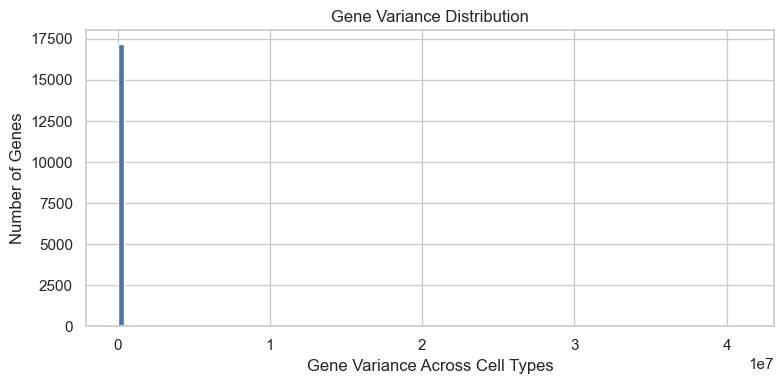

count    1.753500e+04
mean     5.970756e+04
std      6.481425e+05
min      3.050157e-06
25%      3.211117e+00
50%      4.267316e+02
75%      4.783711e+03
max      4.104707e+07
dtype: float64

In [46]:
import matplotlib.pyplot as plt

# Calculate variance for each gene across the 29 cell types
gene_variances = filtered_df.var(axis=1)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(gene_variances, bins=100)
plt.xlabel("Gene Variance Across Cell Types")
plt.ylabel("Number of Genes")
plt.title("Gene Variance Distribution")
plt.tight_layout()
plt.show()

# Optional: Look at exact stats
gene_variances.describe()


In [47]:
# Filter genes by variance threshold
var_threshold = 500
high_var_genes = gene_variances[gene_variances > var_threshold].index
refined_df = filtered_df.loc[high_var_genes]

print(f"Original shape: {filtered_df.shape}")
print(f"After variance filtering: {refined_df.shape}")


Original shape: (17535, 29)
After variance filtering: (8494, 29)


In [48]:
from sklearn.preprocessing import StandardScaler

# Transpose: rows = samples (cell types), columns = features (genes)
transposed = refined_df.T

# Z-score scaling
scaler = StandardScaler()
transposed_scaled = scaler.fit_transform(transposed)

# (Optional) back to DataFrame with labels
transposed_scaled_df = pd.DataFrame(transposed_scaled, index=transposed.index, columns=transposed.columns)


In [49]:
transposed = refined_df.T
transposed.head()


,0610007P14Rik,0610009B22Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,1110004E09Rik,1110004F10Rik,1110008L16Rik,...,Zswim8,Zufsp,Zw10,Zwilch,Zwint,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
preT.DN1.Th,162.641117,68.070719,160.246297,155.767862,146.959609,147.315383,110.833671,72.055933,749.822124,140.782792,...,75.250417,107.574881,196.329630,59.813775,412.930595,174.486586,1102.093601,145.971474,305.759992,165.105875
preT.DN2a.Th,206.945221,82.468806,125.475307,273.998186,166.023337,146.009167,137.259987,72.322612,804.531997,119.763309,...,52.010176,86.629482,213.695086,92.412375,440.133238,133.170236,727.291384,154.743640,260.956800,211.656296
preT.DN2b.Th,209.187788,89.769337,155.928005,154.269870,245.243593,161.827642,124.749368,82.909098,802.684643,85.457918,...,63.935259,80.287351,226.407453,122.999419,364.562447,166.528710,399.395780,132.590213,249.726900,202.104434
preT.DN3.Th,198.421365,57.661619,120.692893,129.834226,225.662176,187.582633,178.268286,145.793925,817.759773,79.469101,...,62.974653,86.365967,262.319019,100.864308,384.143310,164.850226,248.382338,150.298107,291.366650,185.255146
T.DN4.Th,215.056475,76.399214,118.433597,197.843435,252.196726,153.613650,152.467579,182.459917,957.467722,89.810155,...,44.574791,81.943980,305.814673,144.660778,362.089698,146.115393,142.239852,132.912133,274.503519,242.887242


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transposed_scaled = scaler.fit_transform(transposed)


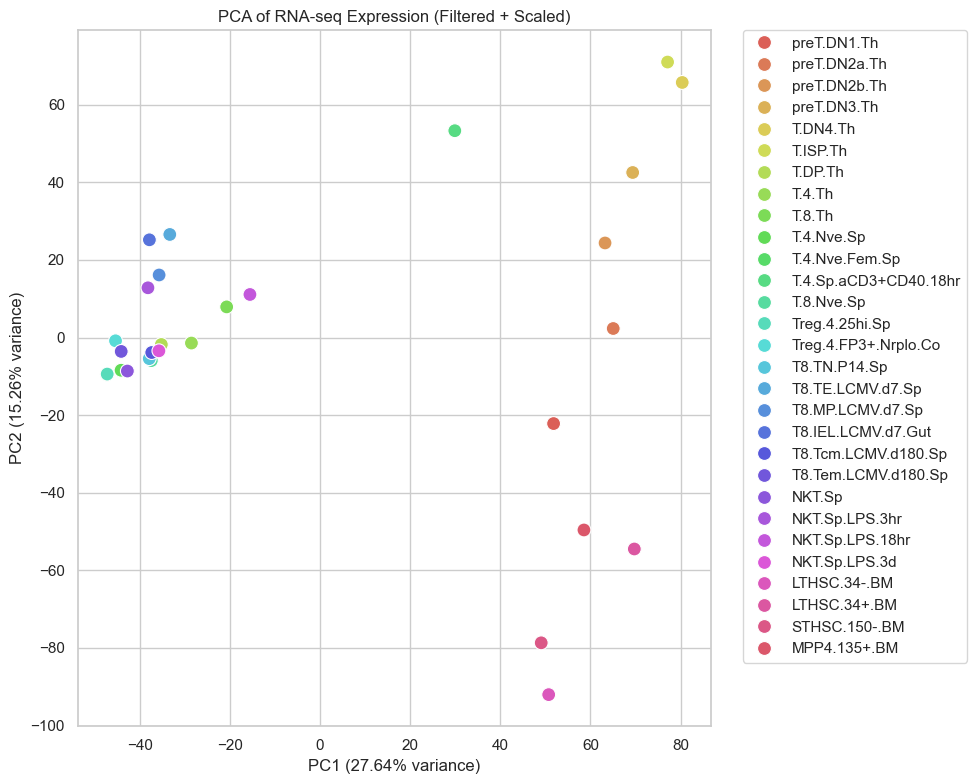

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(transposed_scaled)

# Build PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=transposed.index)
pca_df["CellType"] = pca_df.index  # Make sure cell types are in a column

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="CellType",
    palette=sns.color_palette("hls", n_colors=pca_df["CellType"].nunique()),
    s=100
)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA of RNA-seq Expression (Filtered + Scaled)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [58]:
pca_df  # but this will print the full table


,PC1,PC2,CellType
preT.DN1.Th,51.812371,-22.163610,preT.DN1.Th
preT.DN2a.Th,65.049692,2.336480,preT.DN2a.Th
preT.DN2b.Th,63.233074,24.380450,preT.DN2b.Th
preT.DN3.Th,69.364338,42.544821,preT.DN3.Th
T.DN4.Th,80.363870,65.748445,T.DN4.Th
T.ISP.Th,77.111275,71.012310,T.ISP.Th
T.DP.Th,-35.234807,-1.781571,T.DP.Th
T.4.Th,-28.557515,-1.410192,T.4.Th
T.8.Th,-20.740881,7.905592,T.8.Th
T.4.Nve.Sp,-44.176999,-8.418209,T.4.Nve.Sp


/opt/miniconda3/envs/REAL_FORKED_Bioinfo_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


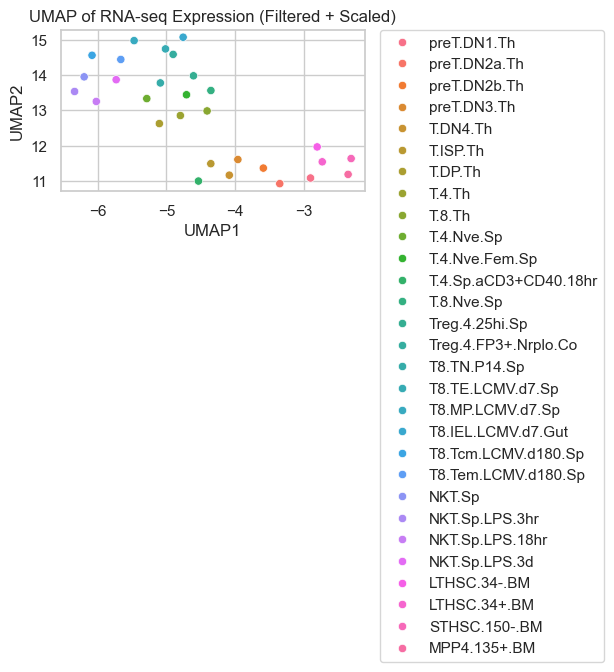

In [63]:
import umap.umap_ as umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Run UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(transposed_scaled)

# Make a DataFrame
umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=refined_df.columns)
umap_df["CellType"] = umap_df.index

# Plot
umap_df = umap_df.reset_index(drop=True)
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="CellType")
plt.title("UMAP of RNA-seq Expression (Filtered + Scaled)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()


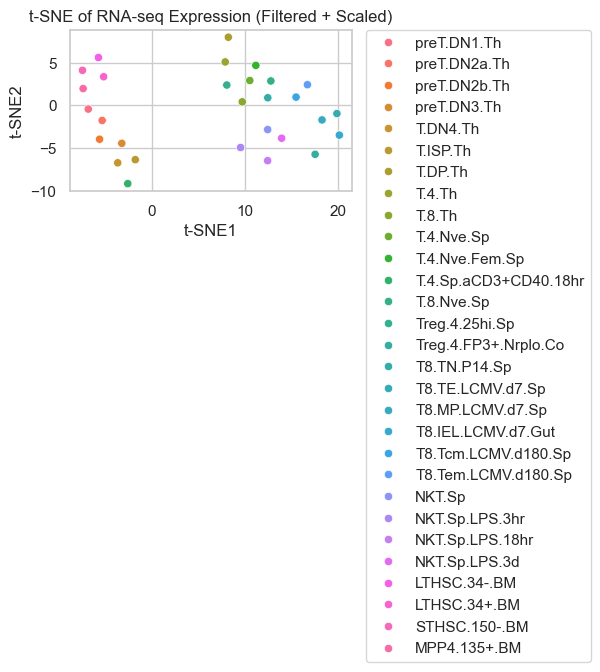

In [64]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_result = tsne_model.fit_transform(transposed_scaled)

# Make a DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"], index=refined_df.columns)
tsne_df["CellType"] = tsne_df.index

# Plot
tsne_df = tsne_df.reset_index(drop=True)
sns.scatterplot(data=tsne_df, x="t-SNE1", y="t-SNE2", hue="CellType")
plt.title("t-SNE of RNA-seq Expression (Filtered + Scaled)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()


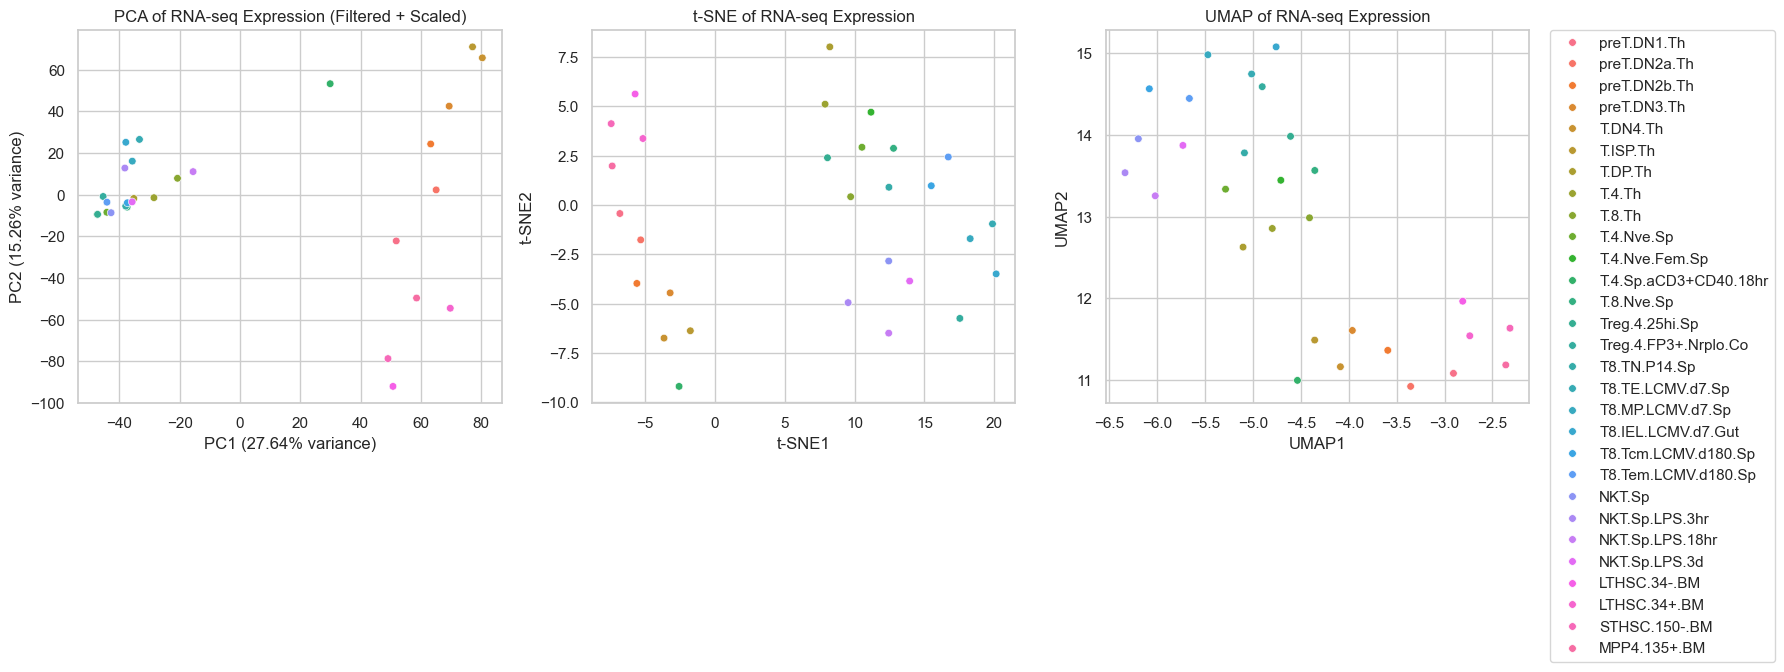

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure with 1 row and 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- PCA ---
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="CellType", s=30,
    ax=axes[0], legend=False
)
axes[0].set_title("PCA of RNA-seq Expression (Filtered + Scaled)")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

# --- t-SNE ---
sns.scatterplot(
    data=tsne_df,
    x="t-SNE1", y="t-SNE2",
    hue="CellType", s=30,
    ax=axes[1], legend=False
)
axes[1].set_title("t-SNE of RNA-seq Expression")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

# --- UMAP ---
sns.scatterplot(
    data=umap_df,
    x="UMAP1", y="UMAP2",
    hue="CellType", s=30,
    ax=axes[2]
)
axes[2].set_title("UMAP of RNA-seq Expression")
axes[2].set_xlabel("UMAP1")
axes[2].set_ylabel("UMAP2")

# Move legend to the right of UMAP plot
axes[2].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# Final layout
plt.tight_layout()
plt.show()
